In [1]:
# import pandas library
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# loading dataset
apps = pd.read_csv("../../datasets/google-play-store-apps/googleplaystore.csv")
apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


# Overview

In [3]:
# number of rows and columns
apps.shape

(10841, 13)

In [4]:
# print columns
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Cleanup (remove na and duplicate)

In [5]:
# check missing data
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
apps.shape

(10841, 13)

In [7]:
# drop missing data
apps.dropna(how="any", inplace=True)
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
# check number or data rows after drop na
apps.shape

(9360, 13)

In [9]:
# check number of duplicated
apps.duplicated().sum()

474

In [10]:
# drop duplicated
apps.drop_duplicates(inplace=True)
apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [11]:
# check data table after drop duplicated
apps.duplicated().sum()

0

# Rating

In [12]:
# overview on rating
apps.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [14]:
# remove one invalid row with have rating value is 19
apps = apps.drop([10472])
apps.Rating.describe()

KeyError: "['10472'] not found in axis"

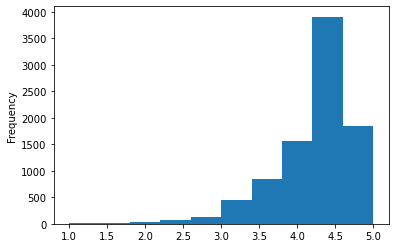

In [15]:
# draw distributed graph
# most of rating are around 4
apps.Rating.plot(kind="hist")

In [16]:
# the most hight rate apps
apps.sort_values(by=["Rating"], ascending=False, inplace=True)
apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10609,"Trinity Church Deltona, FL",LIFESTYLE,5.0,33,28M,500+,Free,0,Everyone,Lifestyle,"May 7, 2018",1.9.0.0,2.3.3 and up
8101,NOMISMA.com.cy by FMW,NEWS_AND_MAGAZINES,5.0,3,Varies with device,100+,Free,0,Everyone,News & Magazines,"May 29, 2016",700,4.0 and up
7442,Sir C J New Primary School,FAMILY,5.0,3,9.2M,100+,Free,0,Everyone,Education,"July 25, 2018",1.0.10,4.0 and up


# Category

In [17]:
# print categories
apps["Category"].unique()

array(['LIFESTYLE', 'NEWS_AND_MAGAZINES', 'FAMILY', 'TOOLS',
       'TRAVEL_AND_LOCAL', 'HEALTH_AND_FITNESS', 'PRODUCTIVITY', 'GAME',
       'SOCIAL', 'MEDICAL', 'LIBRARIES_AND_DEMO', 'BUSINESS', 'SHOPPING',
       'FOOD_AND_DRINK', 'BOOKS_AND_REFERENCE', 'DATING', 'COMMUNICATION',
       'PERSONALIZATION', 'FINANCE', 'COMICS', 'SPORTS', 'EVENTS',
       'ART_AND_DESIGN', 'PHOTOGRAPHY', 'PARENTING', 'VIDEO_PLAYERS',
       'EDUCATION', 'MAPS_AND_NAVIGATION', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'HOUSE_AND_HOME', 'WEATHER', 'ENTERTAINMENT'], dtype=object)

In [18]:
# print number of categories
len(apps["Category"].unique())

33

In [19]:
# counting number of each category
apps["Category"].value_counts().sort_values(ascending=False)

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

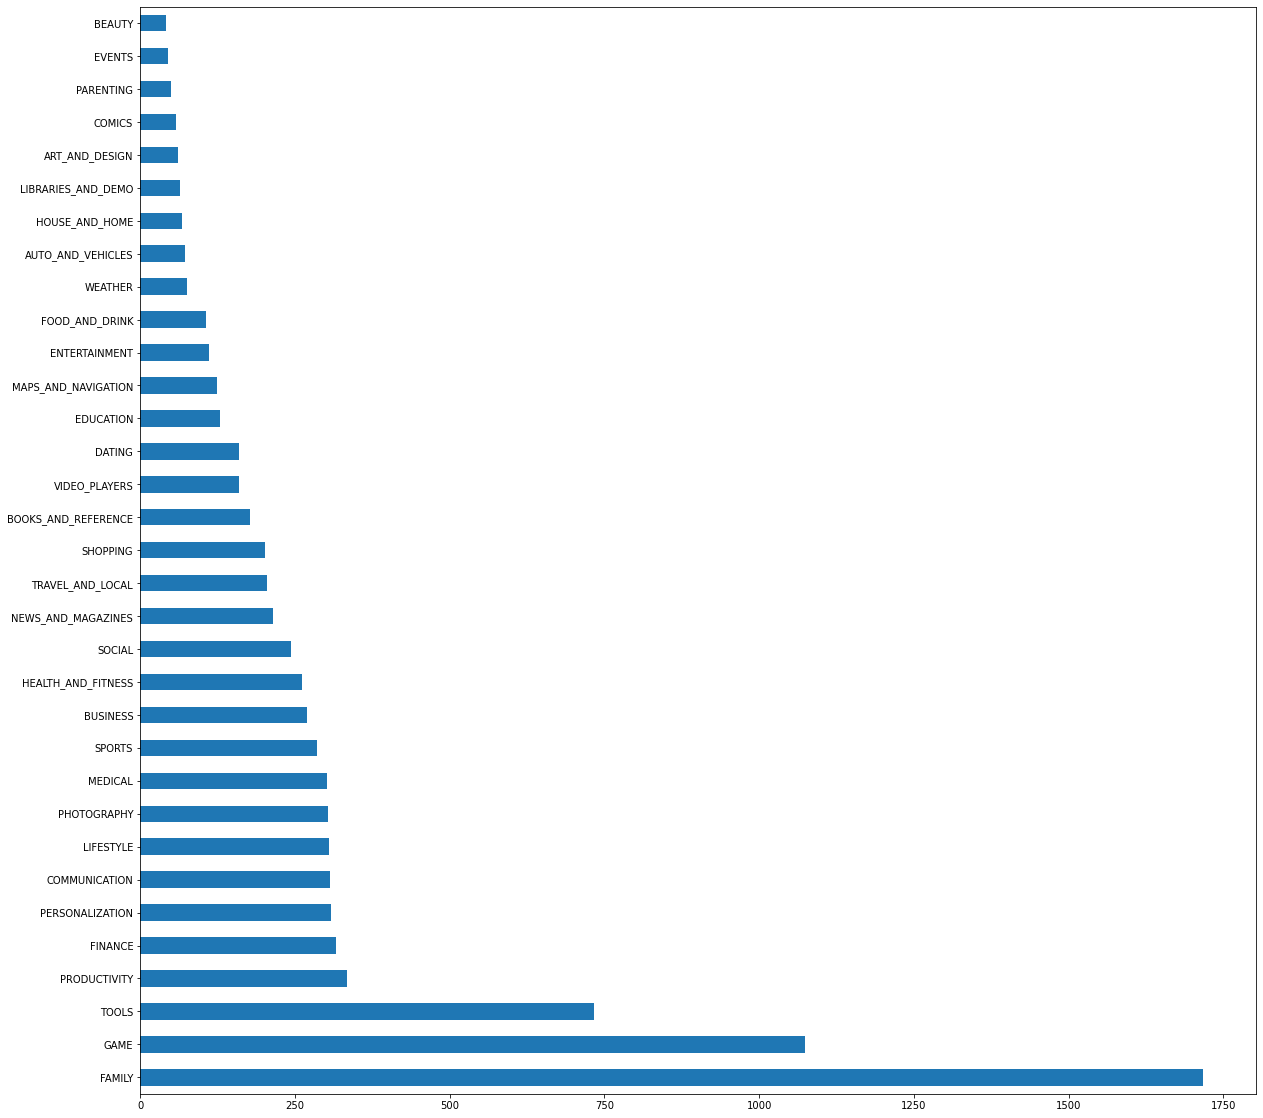

In [20]:
# then plot number of each category
# setting figsize to have a good figure
plt.figure(figsize=(20, 20))
apps["Category"].value_counts().plot(kind="barh")

# Review

In [21]:
# check review data
apps["Reviews"].head()

10609    33
8101      3
7442      3
3957      2
7435      6
Name: Reviews, dtype: object

In [22]:
# need to convert reviews to int number
# introduce lambda function
apps["Reviews"] = apps["Reviews"].apply(lambda x: int(x))
apps["Reviews"].head()

10609    33
8101      3
7442      3
3957      2
7435      6
Name: Reviews, dtype: int64

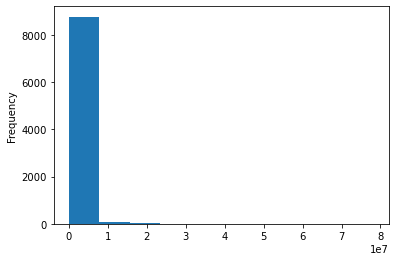

In [23]:
# plot reivew distribution
apps["Reviews"].plot(kind="hist")

In [24]:
apps["Reviews"].describe()

count    8.886000e+03
mean     4.730928e+05
std      2.906007e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.723000e+03
75%      7.131325e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [25]:
# find out 20 most review app
apps.sort_values(by=["Reviews"], ascending=False, inplace=True)
apps.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


# Size

In [26]:
apps["Size"].head()

2544    Varies with device
3943    Varies with device
336     Varies with device
3904    Varies with device
2604    Varies with device
Name: Size, dtype: object

In [27]:
# need to have transfom in size data
apps["Size"].unique()

# size contain 'Varies with device', we will set this side to NaN
# size have K a M at end and need to convert to number

array(['Varies with device', '98M', '76M', '97M', '74M', '40M', '52M',
       '14M', '15M', '88M', '24M', '85M', '94M', '99M', '63M', '92M',
       '17M', '62M', '71M', '70M', '34M', '95M', '67M', '58M', '100M',
       '59M', '53M', '96M', '16M', '26M', '41M', '9.9M', '51M', '32M',
       '11M', '55M', '60M', '79M', '69M', '42M', '77M', '57M', '82M',
       '75M', '36M', '3.3M', '68M', '22M', '7.6M', '50M', '33M', '7.4M',
       '89M', '18M', '25M', '78M', '46M', '49M', '9.7M', '37M', '72M',
       '39M', '87M', '6.1M', '5.1M', '28M', '29M', '61M', '7.1M', '48M',
       '21M', '35M', '54M', '12M', '56M', '3.8M', '8.7M', '91M', '27M',
       '45M', '66M', '31M', '4.7M', '8.2M', '43M', '13M', '47M', '20M',
       '80M', '6.6M', '3.1M', '6.5M', '9.1M', '30M', '7.9M', '4.2M',
       '44M', '4.4M', '93M', '8.9M', '83M', '3.5M', '73M', '90M', '9.8M',
       '19M', '9.2M', '64M', '1.5M', '5.2M', '23M', '5.3M', '2.5M', '10M',
       '2.7M', '2.1M', '86M', '4.9M', '2.9M', '9.0M', '8.4M', '7.3M'

In [28]:
# number of rows with size has value 'Varies with device'
len(apps[apps["Size"] == "Varies with device"])

1468

In [29]:
import numpy as np

In [30]:
# replace 'Varies with device' with 'nan' value
apps["Size"].replace("Varies with device", np.nan, inplace=True)
len(apps[apps["Size"] == "Varies with device"])
len(apps[apps["Size"] == np.nan])

0

In [31]:
# convert size which end with K
def convert_size(size):
    if size is not np.nan:
        if "k" in size:
            return float(size.replace("k", "")) * 1000
        if "M" in size:
            return float(size.replace("M", "")) * 1000000


# apply convert size
apps["Size"] = apps["Size"].apply(convert_size)

In [32]:
# set NaN value to mean
apps["Size"].mean()

# how to find mean of each category ? , that will be better
apps["Size"].fillna(apps["Size"].mean(), inplace=True)

len(apps[apps["Size"] == np.nan])

0

In [33]:
# print largest size apps
apps.sort_values(by=["Size"], ascending=False, inplace=True)
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7404,SimCity BuildIt,FAMILY,4.5,4218587,100000000.0,"50,000,000+",Free,0,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,"5,000,000+",Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100000000.0,"10,000+",Free,0,Everyone,Racing,"May 20, 2018",1.03,4.1 and up
1080,Post Bank,FINANCE,4.5,60449,100000000.0,"1,000,000+",Free,0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100000000.0,"5,000,000+",Free,0,Everyone,Sports,"May 11, 2018",25.7,4.1 and up


# Install

In [34]:
apps["Installs"].head()

7404    50,000,000+
1793     5,000,000+
8409        10,000+
1080     1,000,000+
8847     5,000,000+
Name: Installs, dtype: object

In [35]:
# Need to convert install data
# remove +
# remove ,
# convert to int number
def convert_install(number):
    return int(number.replace("+", "").replace(",", ""))


apps["Installs"] = apps["Installs"].apply(convert_install)
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7404,SimCity BuildIt,FAMILY,4.5,4218587,100000000.0,50000000,Free,0,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000,Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
8409,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100000000.0,10000,Free,0,Everyone,Racing,"May 20, 2018",1.03,4.1 and up
1080,Post Bank,FINANCE,4.5,60449,100000000.0,1000000,Free,0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
8847,Draft Simulator for FUT 18,SPORTS,4.6,162933,100000000.0,5000000,Free,0,Everyone,Sports,"May 11, 2018",25.7,4.1 and up


In [36]:
apps.sort_values(by=["Installs"], ascending=False, inplace=True)
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,2.276083e+07,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,2.276083e+07,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613,2.276083e+07,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,1.300000e+07,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,1.300000e+07,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up


# Type

In [37]:
# show unique data type
apps["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [38]:
# count number of free and paid app, almost of apps are free
apps["Type"].value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

# Price

In [39]:
apps["Price"].head()

2853    0
341     0
4098    0
3816    0
9844    0
Name: Price, dtype: object

In [40]:
apps["Price"].unique()
# need remove $ and convert number to float type

array(['0', '$6.99', '$0.99', '$4.99', '$2.99', '$1.99', '$5.99', '$2.49',
       '$3.99', '$9.99', '$4.49', '$3.49', '$1.49', '$9.00', '$11.99',
       '$399.99', '$24.99', '$3.95', '$7.99', '$8.99', '$2.90', '$14.99',
       '$13.99', '$19.99', '$29.99', '$4.77', '$10.00', '$299.99',
       '$2.59', '$1.97', '$3.90', '$389.99', '$18.99', '$1.20', '$2.50',
       '$2.95', '$1.59', '$17.99', '$12.99', '$16.99', '$3.28', '$5.49',
       '$400.00', '$1.00', '$4.60', '$1.50', '$1.29', '$2.56', '$10.99',
       '$7.49', '$79.99', '$3.08', '$379.99', '$19.40', '$37.99',
       '$33.99', '$4.84', '$4.29', '$1.61', '$1.70', '$8.49', '$15.46',
       '$15.99', '$2.00', '$6.49', '$14.00', '$4.59', '$3.88', '$39.99',
       '$3.02', '$1.76', '$1.75', '$3.04'], dtype=object)

In [41]:
def convert_price(price):
    if "$" in str(price):
        return float(price.replace("$", ""))
    else:
        return price


apps["Price"] = apps["Price"].apply(convert_price)

# findout the most expensive apps
apps.sort_values(by=["Price"], ascending=False, inplace=True)
apps.head()

TypeError: '<' not supported between instances of 'float' and 'str'

In [42]:
apps["Price"].describe()
# most of apps are free
# mean is 0.96
# highest paid app is 400$

count     8886
unique      73
top          0
freq      8275
Name: Price, dtype: object

# Genres

In [43]:
apps["Genres"].unique()

array(['Photography', 'Communication', 'Travel & Local',
       'News & Magazines', 'Video Players & Editors', 'Social', 'Tools',
       'Entertainment', 'Arcade', 'Books & Reference', 'Productivity',
       'Casual', 'Action', 'Health & Fitness', 'Personalization',
       'Shopping', 'Strategy', 'Maps & Navigation', 'Education;Education',
       'Sports', 'Casual;Action & Adventure',
       'Adventure;Action & Adventure', 'Lifestyle', 'Finance', 'Racing',
       'Puzzle', 'Puzzle;Brain Games', 'Business', 'Adventure', 'Trivia',
       'Entertainment;Music & Video', 'Simulation', 'Music', 'Weather',
       'Educational;Pretend Play', 'Puzzle;Action & Adventure',
       'Casual;Pretend Play', 'Art & Design', 'Word', 'Card', 'Board',
       'Role Playing', 'Educational;Action & Adventure',
       'Racing;Action & Adventure', 'Casino', 'Food & Drink', 'Beauty',
       'Arcade;Action & Adventure', 'Comics', 'House & Home',
       'Card;Action & Adventure', 'Simulation;Action & Adventure',


In [44]:
# print number or genres
len(apps["Genres"].unique())

115

In [45]:
apps["Genres"].value_counts().head()
apps["Genres"].value_counts().tail()

Music & Audio;Music & Video    1
Comics;Creativity              1
Lifestyle;Pretend Play         1
Lifestyle;Education            1
Strategy;Creativity            1
Name: Genres, dtype: int64

In [46]:
# only get genres before ; and remove all remain
# print out the unique genre
apps["Genres"] = apps["Genres"].str.split(";").str[0]
apps["Genres"].unique()

array(['Photography', 'Communication', 'Travel & Local',
       'News & Magazines', 'Video Players & Editors', 'Social', 'Tools',
       'Entertainment', 'Arcade', 'Books & Reference', 'Productivity',
       'Casual', 'Action', 'Health & Fitness', 'Personalization',
       'Shopping', 'Strategy', 'Maps & Navigation', 'Education', 'Sports',
       'Adventure', 'Lifestyle', 'Finance', 'Racing', 'Puzzle',
       'Business', 'Trivia', 'Simulation', 'Music', 'Weather',
       'Educational', 'Art & Design', 'Word', 'Card', 'Board',
       'Role Playing', 'Casino', 'Food & Drink', 'Beauty', 'Comics',
       'House & Home', 'Dating', 'Libraries & Demo', 'Auto & Vehicles',
       'Parenting', 'Events', 'Medical', 'Music & Audio'], dtype=object)

In [47]:
len(apps["Genres"].unique())

48